# Performance Mertics in Classification Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve,auc
from sklearn.datasets import load_iris,make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
x,y = make_classification(n_samples=300,n_features=5,n_informative=3,n_classes=2)

* n_samples=300: Generates 300 samples (rows).
* n_features=5: Each sample has 5 features (columns).
* n_informative=3: Among the 5 features, 3 will be informative for determining the target class.
* n_classes=2: There are 2 classes (binary classification problem).

In [3]:
x_tr , x_te, y_tr , y_te= train_test_split(x,y,train_size=0.7, random_state=34)

In [4]:
x_tr.shape

(210, 5)

In [5]:
x_te.shape

(90, 5)

In [6]:
model = LogisticRegression()

In [7]:
model.fit(x_tr, y_tr)

LogisticRegression()

In [8]:
model.score(x_tr , y_tr)

0.6904761904761905

In [9]:
y_pr = model.predict(x_te)

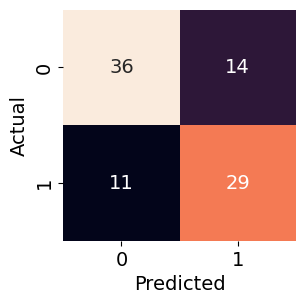

In [10]:
plt.figure(figsize=(3,3))
plt.rcParams["font.size"]=14
sns.heatmap(confusion_matrix(y_te, y_pr),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
tn, fp, fn, tp = confusion_matrix(y_te , y_pr).ravel()

In [12]:
tn, fp, fn, tp

(np.int64(36), np.int64(14), np.int64(11), np.int64(29))

In [13]:
accuracy_score(y_te, y_pr)

0.7222222222222222

In [14]:
(tp + tn)/(tp + tn + fp + fn)

np.float64(0.7222222222222222)

In [15]:
print(classification_report(y_te , y_pr))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        50
           1       0.67      0.72      0.70        40

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.73      0.72      0.72        90



In [16]:
precision = tp / (tp + fp)
precision

np.float64(0.6744186046511628)

In [17]:
recall=tp / (tp + fn)
recall

np.float64(0.725)

In [18]:
f1_score = (2*precision*recall) / (precision + recall)
f1_score

np.float64(0.6987951807228916)

In [19]:
y_pre_prob = model.predict_proba(x_te)[:,1]

> [:,1]
* Extracts the probabilities of the positive class (1)

In [20]:
y_pre_prob

array([0.50335214, 0.41177623, 0.83594527, 0.79481532, 0.52658244,
       0.61382072, 0.52116154, 0.66710446, 0.52039063, 0.67048229,
       0.69931138, 0.10148534, 0.92855164, 0.68769566, 0.37065022,
       0.29201165, 0.52954403, 0.66242248, 0.65919355, 0.66881776,
       0.47846344, 0.54639436, 0.4214451 , 0.29665739, 0.63014475,
       0.80737792, 0.85020919, 0.42119309, 0.40165213, 0.90549667,
       0.47514511, 0.65819191, 0.58285326, 0.15467018, 0.34724932,
       0.76886573, 0.41588573, 0.33630158, 0.88084415, 0.42969834,
       0.38609207, 0.59067906, 0.42411573, 0.67914899, 0.3753689 ,
       0.80185325, 0.8537395 , 0.38770468, 0.47409809, 0.47570186,
       0.40999218, 0.36777134, 0.44257148, 0.43433293, 0.6710809 ,
       0.41760184, 0.4021911 , 0.84835768, 0.33353528, 0.62658493,
       0.48593323, 0.35194244, 0.71362605, 0.39923816, 0.66986234,
       0.62295807, 0.35543894, 0.58124096, 0.33988414, 0.42593297,
       0.41816513, 0.60763277, 0.94075115, 0.36237512, 0.39598

In [21]:
fpr, tpr, threshold = roc_curve(y_te , y_pre_prob)


* ROC Curve (Receiver Operating Characteristic Curve) metrics for evaluating the performance of a binary classification model.

In [23]:
fpr, tpr, threshold

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.06, 0.06, 0.08, 0.08,
        0.1 , 0.1 , 0.16, 0.16, 0.2 , 0.2 , 0.26, 0.26, 0.28, 0.28, 0.3 ,
        0.3 , 0.38, 0.38, 0.4 , 0.4 , 0.9 , 0.9 , 0.98, 0.98, 1.  , 1.  ]),
 array([0.   , 0.025, 0.2  , 0.2  , 0.275, 0.275, 0.3  , 0.3  , 0.4  ,
        0.4  , 0.425, 0.425, 0.525, 0.525, 0.6  , 0.6  , 0.625, 0.625,
        0.725, 0.725, 0.75 , 0.75 , 0.775, 0.775, 0.825, 0.825, 0.85 ,
        0.85 , 0.9  , 0.9  , 0.975, 0.975, 1.   ]),
 array([       inf, 0.94075115, 0.83594527, 0.80737792, 0.76886573,
        0.71362605, 0.69931138, 0.68769566, 0.67048229, 0.66986234,
        0.66881776, 0.66710446, 0.65919355, 0.62658493, 0.60763277,
        0.59067906, 0.58285326, 0.52954403, 0.50470966, 0.50335214,
        0.48593323, 0.47846344, 0.47570186, 0.43433293, 0.42593297,
        0.42411573, 0.4214451 , 0.33353528, 0.3088454 , 0.25975063,
        0.2271107 , 0.15467018, 0.10148534]))

In [27]:
auc_score = auc(fpr , tpr)

* auc_score: The numerical value of the area under the ROC Curve.

In [28]:
auc_score

np.float64(0.7495)

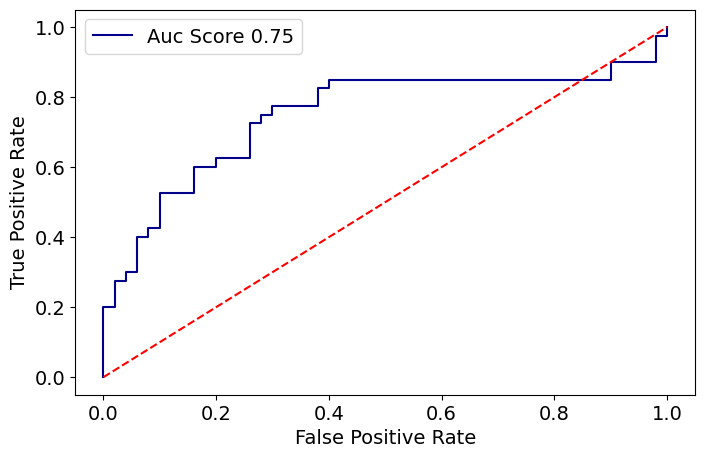

In [25]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color="darkblue",label=f"Auc Score {np.round(auc_score,2)}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],color="red",ls="--")
plt.legend()
plt.show()

In [30]:
dt_model = DecisionTreeClassifier(max_depth=3)

In [31]:
dt_model.fit(x_tr , y_tr)

DecisionTreeClassifier(max_depth=3)

In [32]:
dt_y_pr = dt_model.predict(x_te)

In [33]:
dt_y_pr_prob = dt_model.predict_proba(x_te)[:,1]

In [34]:
dt_y_pr_prob

array([0.82857143, 0.        , 0.82857143, 0.22727273, 1.        ,
       0.22727273, 0.82857143, 0.22727273, 1.        , 0.82857143,
       0.82857143, 0.82857143, 0.82857143, 0.82857143, 0.        ,
       0.        , 0.22727273, 0.22727273, 0.82857143, 1.        ,
       0.82857143, 0.22727273, 1.        , 0.22727273, 0.22727273,
       0.22727273, 1.        , 0.22727273, 0.        , 1.        ,
       0.        , 0.82857143, 0.22727273, 0.22727273, 0.22727273,
       0.82857143, 0.22727273, 0.        , 0.82857143, 1.        ,
       0.22727273, 0.22727273, 0.82857143, 0.82857143, 0.        ,
       0.82857143, 0.82857143, 0.22727273, 0.82857143, 0.82857143,
       0.82857143, 0.22727273, 0.22727273, 0.22727273, 0.82857143,
       0.        , 0.82857143, 0.82857143, 0.        , 0.82857143,
       0.82857143, 0.        , 0.22727273, 0.22727273, 0.82857143,
       0.82857143, 0.        , 0.22727273, 0.22727273, 1.        ,
       0.22727273, 0.82857143, 0.82857143, 0.22727273, 0.     

In [35]:
dt_fpr, dt_tpr, dt_th = roc_curve(y_te, dt_y_pr_prob)

In [36]:
dt_auc = auc(dt_fpr, dt_tpr)
dt_auc

np.float64(0.8740000000000001)

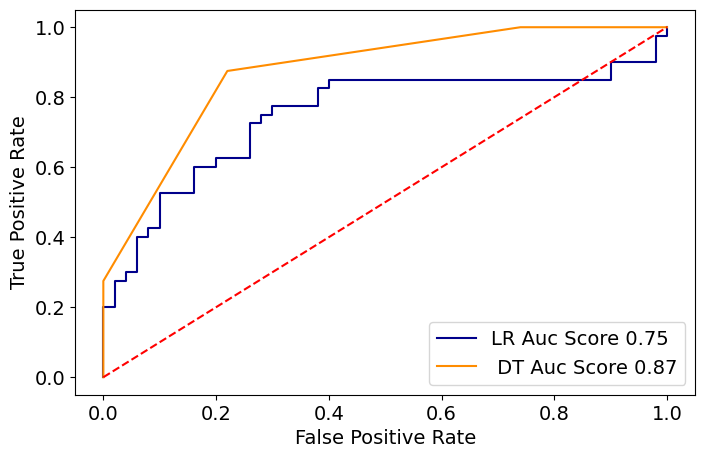

In [37]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color="darkblue",label=f"LR Auc Score {np.round(auc_score,2)}")
plt.plot(dt_fpr,dt_tpr,color="darkorange", label=f" DT Auc Score {dt_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],color="red",ls="--")
plt.legend()
plt.show()

> * AUC summarizes the trade-off between sensitivity (TPR) and specificity (1-FPR).
> * Higher AUC indicates better performance across all thresholds.
> * AUC is threshold-independent, making it a robust evaluation metric for binary classifiers.

> Linear Regression (AUC = 0.75):

* This score suggests that Linear Regression has a moderate ability to distinguish between the positive and negative classes.
* AUC = 0.75 means that for 75% of randomly chosen positive-negative class pairs, the model assigns a higher probability to the positive class.

> Decision Tree (AUC = 0.87):

* A higher AUC score (closer to 1) means better classification performance.
* AUC = 0.87 indicates the Decision Tree has a strong ability to differentiate between the classes and is more effective than Linear Regression in this case.

> Possible Reasons for Better Performance of Decision Tree:

    > Non-linearity:
        * Decision Trees capture non-linear relationships in the data, whereas Linear Regression assumes a linear relationship.

    > Feature Interactions:
        * Decision Trees automatically account for interactions between features, which could improve performance if such interactions are present.

    > Decision Boundaries:
        * Decision Trees create discrete splits, which might be better suited for certain datasets compared to the continuous boundaries of Linear Regression.
